In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
full = pd.read_csv('Zip_Zhvi_AllHomes.csv')
del full['RegionID'], full['SizeRank'], full['Metro'], full['City']

ppsqft = pd.read_csv('Zip_MedianListingPricePerSqft_AllHomes.csv')
del ppsqft['SizeRank'], ppsqft['Metro'], ppsqft['City']

In [3]:
bayarea_counties = ['Alameda', 'Contra Costa', 'Marin', 'Napa', 'San Francisco', 'San Mateo', 'Santa Clara', 'Solano', 'Sonoma']

In [4]:
point_labels = ['Nantucket', 'New York', 'San Miguel', 'Dukes']
ppsqft_point_labels = ['New York', 'Nantucket', 'Pitkin', 'San Miguel']
ppsqft_pct_change_labels = ['Fannin', 'Yolo', 'Chautauqua', 'Navarro']
ba_county_labels = ['San Mateo', 'Santa Clara']

In [5]:
grouped = full.groupby('CountyName').mean().transpose()
grouped = grouped.iloc[1:,:]
grouped.index = pd.to_datetime(grouped.index)
grouped_ba = grouped.loc[:,bayarea_counties]
grouped = grouped.drop(bayarea_counties, axis =1)

pct_change = pd.concat([grouped['2010-01'], grouped['2018-04']]).transpose()
pct_change['change'] = (pct_change.iloc[:,1] - pct_change.iloc[:,0])/(pct_change.iloc[:,0]) * 100
pct_change_ba = pd.concat([grouped_ba['2010-01'], grouped_ba['2018-04']]).transpose()
pct_change_ba['change'] = (pct_change_ba.iloc[:,1] - pct_change_ba.iloc[:,0])/(pct_change_ba.iloc[:,0]) * 100

ppsqft_grouped = ppsqft.groupby('CountyName').mean().transpose()
ppsqft_grouped = ppsqft_grouped.iloc[1:,:]
ppsqft_grouped.index = pd.to_datetime(ppsqft_grouped.index)
ppsqft_grouped_ba = ppsqft_grouped.loc[:, bayarea_counties]
ppsqft_grouped = ppsqft_grouped.drop(bayarea_counties, axis =1)

ppsqft_pct_change = pd.concat([ppsqft_grouped['2010-01'], ppsqft_grouped['2018-04']]).transpose()
ppsqft_pct_change['change'] = (ppsqft_pct_change.iloc[:,1] - ppsqft_pct_change.iloc[:,0])/(ppsqft_pct_change.iloc[:,0]) * 100
ppsqft_pct_change_ba = pd.concat([ppsqft_grouped_ba['2010-01'], ppsqft_grouped_ba['2018-04']]).transpose()
ppsqft_pct_change_ba['change'] = (ppsqft_pct_change_ba.iloc[:,1] - ppsqft_pct_change_ba.iloc[:,0])/(ppsqft_pct_change_ba.iloc[:,0]) * 100

# Bay Area Real Estate Boom

Over the past few years, the San Francisco Bay Area has seen a rise in home prices that some have questioned, "Is it worth living in the Bay Area?". The Bay Area has certainly seen an influx in population as a hub for technological innovation but how do it's home values compare to other parts of the nation? What kind of trend are these prices heading towards and what does that mean for prospective home seekers?

In the late 2000s, the United States nationwide saw a steep decline in real estate prices as what's known as the Great Recession and didn't recover until around 2010. The following analysis will look how the housing market has ballooned into what it is now since 2010. 

## Comparing by Bay Area County

If we first look at how houses within the Bay Area are priced (shown below), we notice some patterns emerge. Since the end of the Great Recession, each county has seen their housing prices steadily increase over time. We also notice that some counties are growing faster than others which is causing a disparity within the Bay Area. Big companies like Facebook, Google, and Twitter are all headquarted within San Mateo, Santa Clara, and San Francisco counties which are counties, along with Marin county, that seem to have grown quicker than the rest of the Bay Area. Whether these are correlated or not will need to be looked into further but there does seem to a factor that's causing the aggressive growth in those 4 counties which I'll call the 'upper tier' for the the remainder of this project. There's been so much growth in the 'upper tier' counties that their prices are nearly double the prices of the 'lower tier' counties. Of the 'upper tier' counties, it seems that San Mateo and Santa Clara are still on the rise as of late.

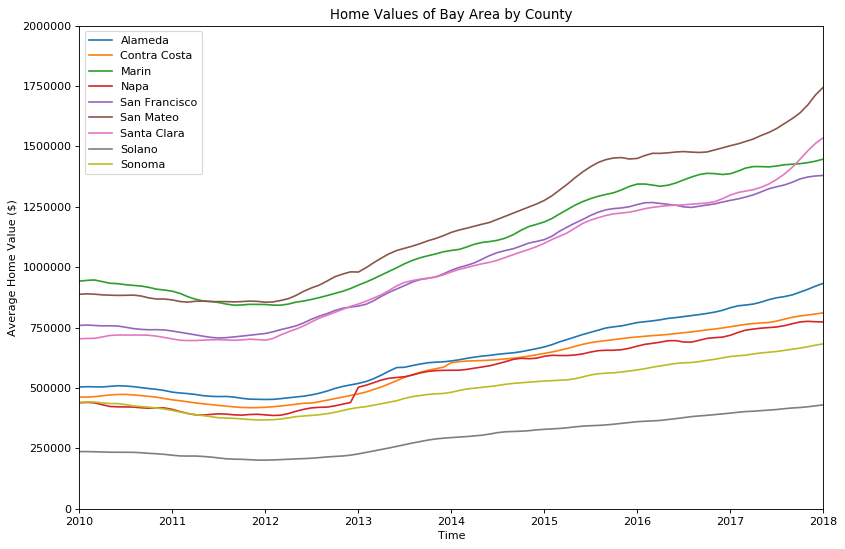

In [6]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')

for county in bayarea_counties:
    plt.plot(grouped_ba[county], label = county)
plt.legend()
plt.title('Home Values of Bay Area by County')
plt.xlabel('Time')
plt.ylabel('Average Home Value ($)')
plt.axis(['2010','2018',0,2000000])
plt.show()

Something to keep in mind is how much is a house per square foot; how do the price per square foot compare from county to county? Each Bay Area county is plotted below by price per square foot by month since 2010 and a couple things stand out. First, the same 'upper tier' counties are again the most expensive by square footage within the Bay Area. It may also be percieved that those counties are growing at a faster rate than the 'lower tier' which almost puts the price per square footage in San Francisco county more than twice as expensive as Alameda county which is only a 10 minute drive across the Bay Bridge.

Note: Data from some areas may be missing due to the fact that this data wasn't being recorded generally prior to 2012.

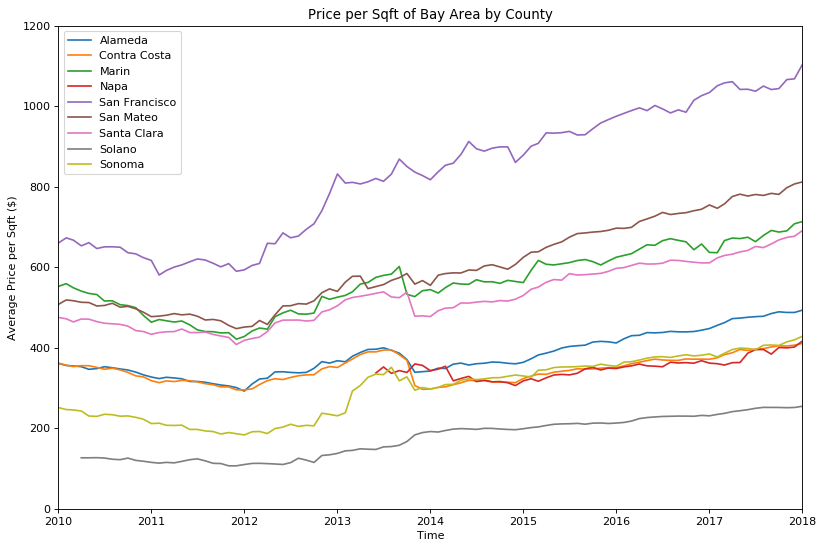

In [7]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')

for county in bayarea_counties:
    plt.plot(ppsqft_grouped_ba[county], label = county)
plt.legend()
plt.title('Price per Sqft of Bay Area by County')
plt.xlabel('Time')
plt.ylabel('Average Price per Sqft ($)')
plt.axis(['2010','2018',0,1200])
plt.show()

## Comparing to Rest of U.S.

Now the question remains, how bad are house prices in the Bay Area compared to the rest of the United States? We've seen how each Bay Area county compares to each other but how do they compare to others around the United States. Comparing Bay Area housing prices in 2010 to other counties around the U.S., we see that most Bay Area counties (dotted in red) were already above average with the 'upper tier' counties in the top 10 in home value. Fast forward to 2018, Bay Area counties have grown more aggressively with the 'upper tier' counties now all within the top 5 in the nation along with a select few counties like Nantucket and New York. But where the insight lies is the percent change in prices.

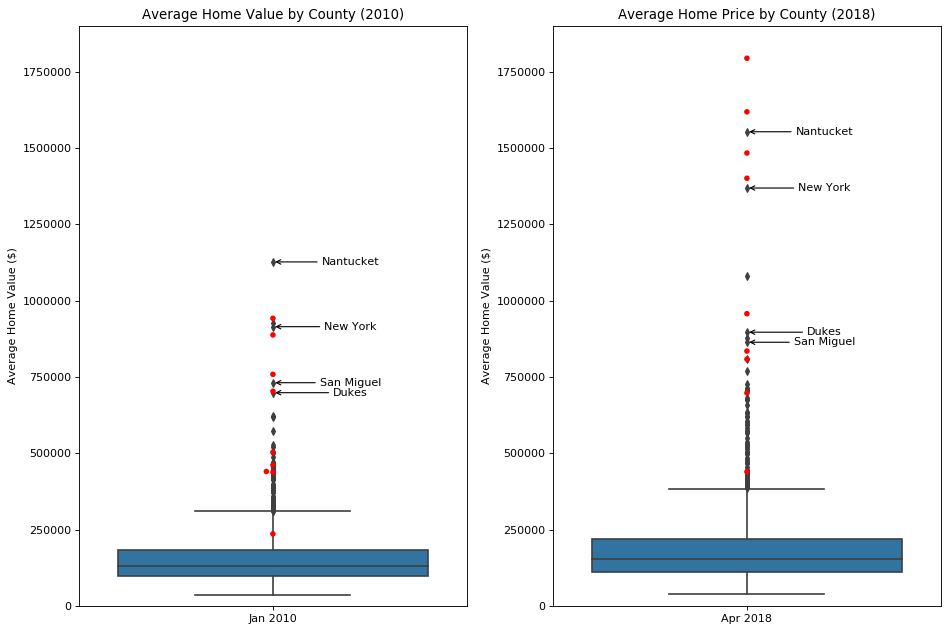

In [21]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot(data = grouped.loc['2010-01',:].transpose())
sns.swarmplot(data = grouped_ba.loc['2010-01',:].transpose(), color = 'red')
plt.title('Average Home Value by County (2010)')
plt.xticks(range(1), ['Jan 2010'])
plt.ylabel('Average Home Value ($)')
plt.ylim([0, 1900000])
for label in point_labels:
    plt.annotate(
        label,
        xy = (0, grouped[label]['2010-01']),
        xytext = (0.2,grouped[label]['2010-01']),
        textcoords='data', ha='center', va='center',
        arrowprops=dict(arrowstyle = '->'))

plt.subplot(1, 2, 2)
sns.boxplot(data = grouped.loc['2018-04',:].transpose())
sns.swarmplot(data = grouped_ba.loc['2018-04',:].transpose(), color = 'red')
plt.title('Average Home Price by County (2018)')
plt.xticks(range(1), ['Apr 2018'])
plt.ylabel('Average Home Value ($)')
plt.ylim([0, 1900000])
for label in point_labels:
    plt.annotate(
        label,
        xy = (0, grouped[label]['2018-04']),
        xytext = (0.2,grouped[label]['2018-04']),
        textcoords='data', ha='center', va='center',
        arrowprops=dict(arrowstyle = '->'))
    
plt.tight_layout()
plt.show()

# add labels, change scale to match, label red dots

Investigating into how fast the housing market has grown in the Bay Area, below are three graphs that represent the same data. The first plots the percent change of all counties in the United States where each dot is a different county. The one's marked in red represent are the nine counties that comprise the Bay Area and they are all well above the percieved average. The second plot is a box plot of the same data with again the red dots representing the Bay Area counties. In this second plot, it's easier to see that 7 of the 9 counties in the Bay Area have grown at a rate that they're considered statistical outliers compared to the rest and that all nine counties within the Bay Area have grown faster than counterparts that were already expensive. Part of the reason is because most houses of the Bay Area counties have grown by 80% or more since 2010 while those same counterparts have grown less than 60%.

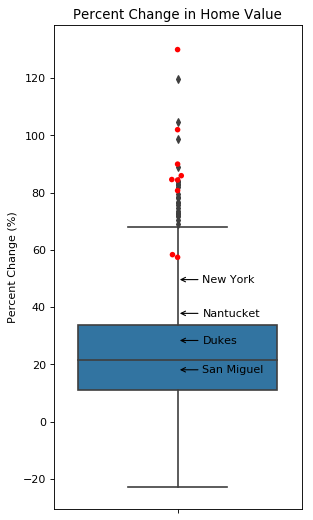

In [9]:
plt.figure(figsize=(4, 8), dpi= 80, facecolor='w', edgecolor='k')

sns.boxplot(pct_change['change'], orient = 'v')
sns.swarmplot(pct_change_ba['change'],
              orient = 'v', color = 'red')
plt.title('Percent Change in Home Value')
plt.ylabel('Percent Change (%)')
for label in point_labels:
    plt.annotate(
        label,
        xy = (0, pct_change['change'][label]),
        xytext = (0.1,pct_change['change'][label]),
        textcoords='data', ha='left', va='center',
        arrowprops=dict(arrowstyle = '->'))

plt.show()

Investigating the overall price of homes in a given area doesn't provide enough evidence of the increase of living costs since homes could be getting bigger/smaller which affects their prices. Another measurement is the price per squarefoot. Below are plots of the price per square foot across all counties with, again, Bay Area counties in red. Note the cluster of county names at the bottom. This was done on purpose and will be discussed after.

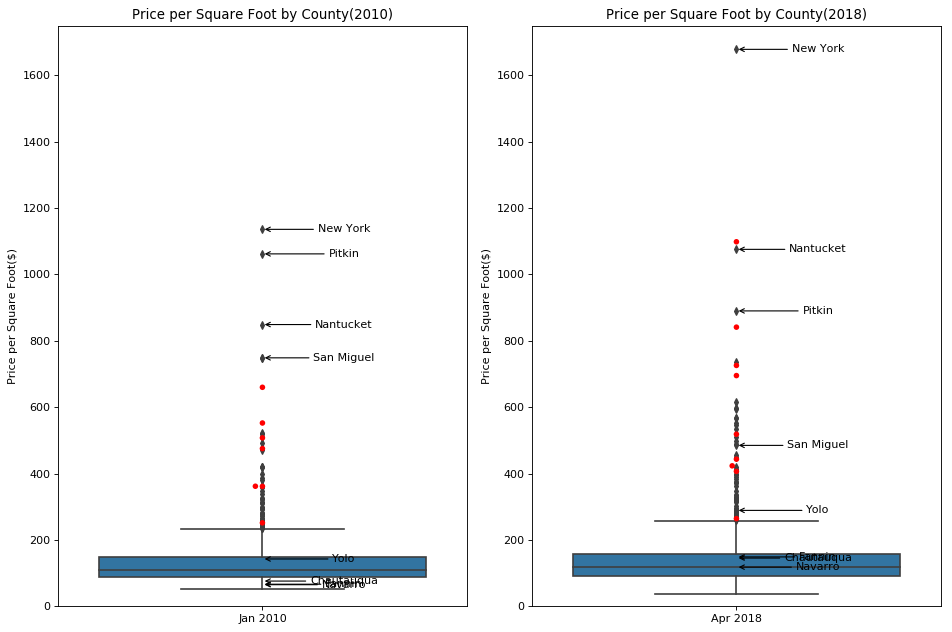

In [22]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot(data = ppsqft_grouped.loc['2010-01',:].transpose())
sns.swarmplot(data = ppsqft_grouped_ba.loc['2010-01',:].transpose(), color = 'red')
plt.title('Price per Square Foot by County(2010)')
plt.xticks(range(1), ['Jan 2010'])
plt.ylabel('Price per Square Foot($)')
plt.ylim([0,1750])
for label in (ppsqft_point_labels + ppsqft_pct_change_labels):
    plt.annotate(
        label,
        xy = (0, ppsqft_grouped[label]['2010-01']),
        xytext = (0.2,ppsqft_grouped[label]['2010-01']),
        textcoords='data', ha='center', va='center',
        arrowprops=dict(arrowstyle = '->'))

plt.subplot(1, 2, 2)
sns.boxplot(data = ppsqft_grouped.loc['2018-04',:].transpose())
sns.swarmplot(data = ppsqft_grouped_ba.loc['2018-04',:].transpose(), color = 'red')
plt.title('Price per Square Foot by County(2018)')
plt.xticks(range(1), ['Apr 2018'])
plt.ylabel('Price per Square Foot($)')
plt.ylim([0,1750])
for label in (ppsqft_point_labels + ppsqft_pct_change_labels):
    plt.annotate(
        label,
        xy = (0, ppsqft_grouped[label]['2018-04']),
        xytext = (0.2,ppsqft_grouped[label]['2018-04']),
        textcoords='data', ha='center', va='center',
        arrowprops=dict(arrowstyle = '->'))

plt.tight_layout()
plt.show()

Once more, you see Bay Area counties towards the top grouped with other big counties in the United States such as New York, Nantucket, Pitkin, and San Miguel counties. But what I find interesting is in the next set of plots below. These plots show the percent change in the price per square foot of each county. Notice how the counties that were most expensive have only changed at most by 50% where some have even decreased in value since 2010. The counties that seemed to have drastically increased in value since 2010 have been counties that were close to the median price and seem to be developing areas. To have Bay Area counties grouped together near the top of these plots shows that, like the others, they're still growing especially counties that are home to big tech companies (Santa Clara, San Mateo, and San Francisco). They have grown 50% or more since 2010 which is more than New York and Nantucket, who are two other counties with expensive cost of living.

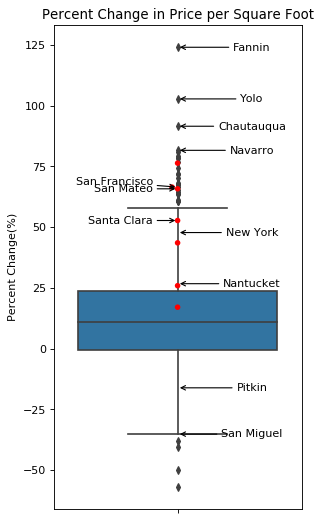

In [11]:
plt.figure(figsize=(4, 8), dpi= 80, facecolor='w', edgecolor='k')

sns.boxplot(ppsqft_pct_change['change'], orient = 'v')
sns.swarmplot(ppsqft_pct_change_ba['change'],
              orient = 'v', color = 'red')
plt.title('Percent Change in Price per Square Foot')
plt.ylabel('Percent Change(%)')
for label in (ppsqft_point_labels + ppsqft_pct_change_labels):
    plt.annotate(
        label,
        xy = (0, ppsqft_pct_change['change'][label]),
        xytext = (0.3,ppsqft_pct_change['change'][label]),
        textcoords='data', ha='center', va='center',
        arrowprops=dict(arrowstyle = '->'))

for label in ba_county_labels:
    plt.annotate(
        label,
        xy = (0, ppsqft_pct_change_ba['change'][label]),
        xytext = (-0.1,ppsqft_pct_change_ba['change'][label]),
        textcoords='data', ha='right', va='center',
        arrowprops=dict(arrowstyle = '->'))
plt.annotate('San Francisco',
            xy = (0, ppsqft_pct_change_ba['change']['San Francisco']),
            xytext = (-0.1, ppsqft_pct_change_ba['change']['San Francisco']),
            textcoords = 'data', ha = 'right', va = 'bottom',
            arrowprops=dict(arrowstyle = '->'))
plt.show()

### Conclusions

Looking at all this data, in 2010, the Bay Area house prices weren't outside the norm when looking at other 'big' counties around the United States. They were grouped together with New York, Nantucket, and Santa Barbara. However, now in 2018, the median value of homes of a number of counties in the Bay Area, specifically those with major tech comapnies, has surpassed them and still seem to be growing as shown in the box plots of percentage change. If you're a prospective home owner looking for somewhere affordable to live, the Bay Area, specifically San Francisco, San Mateo, and Santa Clara, may not be a viable place as their already expensive prices seem to be growing still.